In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS

In [ ]:
#make a function to generate all the filepaths first...
#I'll figure out how to structure this once I get all the data -- will need os

In [41]:
def generate_lc_and_image(filepath):
    #open fits file
    tphdu = fits.open(filepath)
    #select the PIXELS column
    tpf_data = tphdu[1].data
    first_image = tpf_data['FLUX'][1]
    #define wcs for sky coordinates on the image
    wcs = WCS(tphdu[2].header)
    #plot the image
    fig = plt.figure(figsize = (6,6))
    fig.add_subplot(111, projection = wcs)
    plt.imshow(first_image, origin = 'lower', cmap = plt.cm.viridis)
    plt.xlabel('RA', fontsize = 14)
    plt.ylabel('Dec', fontsize = 14)
    plt.grid(axis = 'both', color = 'white', ls = 'solid')
    
    #extract flux values for our pixel (the values are nested)
    flux = []
    for i in range(len(tpf_data['FLUX'])):
        flux_i = tpf_data['FLUX'][i][0][0]
        flux.append(flux_i)
    plt.figure(figsize=[16,4])
    plt.plot(tpf_data['TIME'],flux)
    plt.xlabel('Time [days]',fontsize=12)
    plt.ylabel('Flux [e-/s]',fontsize=12)
    plt.title(file) #pretty this up later

In [42]:
directory = '/Users/waderoemer/Desktop/MScThesis/astrocut_333'
file = 'tess-s0028-1-2_333.412570_-33.198980_1x1_astrocut.fits'
filepath = f'{directory}/{file}'

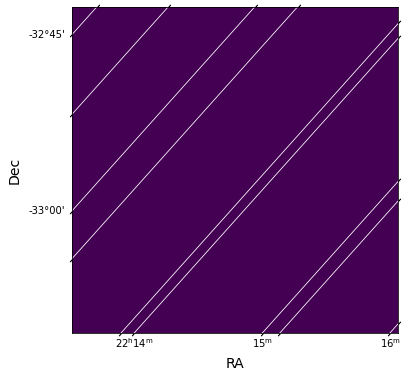

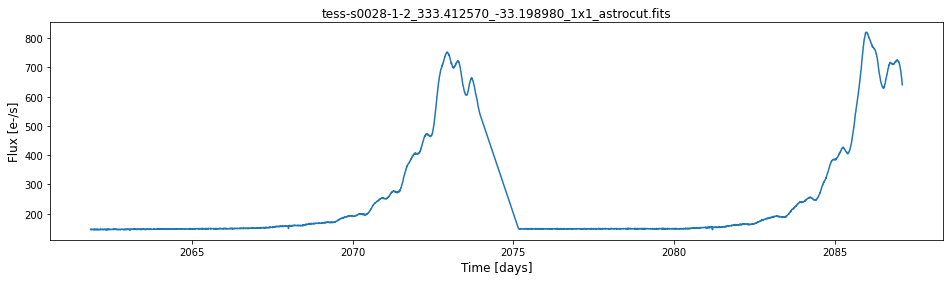

In [43]:
generate_lc_and_image(filepath)

In [44]:
# it works! 
# maybe tidy this up by creating one cohesive plot (use plt.subplots) -- make image and lc the same width and 
# just stack them (?) or add something else in top right and keep it as it is

# the image I am currently displaying is just the first frame, do we want to integrate over all images,
# use an animation, use a median pixel value, show the max and min flux pixels, or ...?

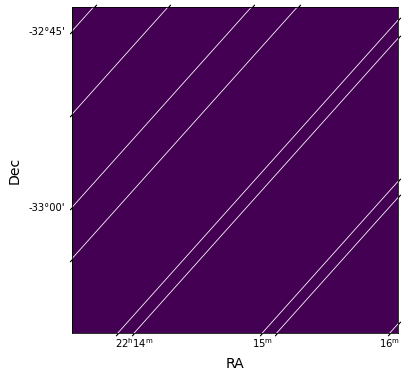

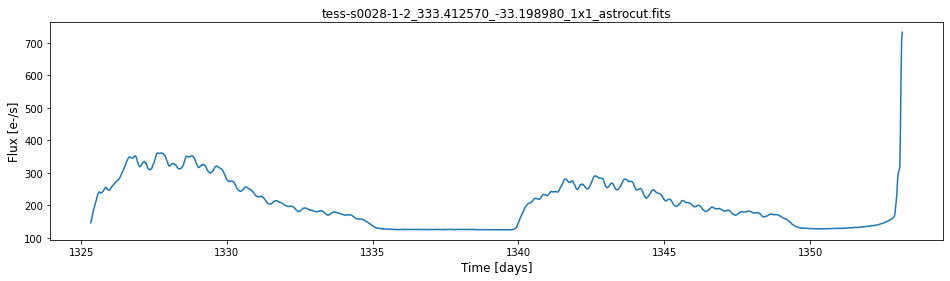

In [45]:
file2 = 'tess-s0001-1-2_333.412570_-33.198980_1x1_astrocut.fits'
filepath2 = f'{directory}/{file2}'
generate_lc_and_image(filepath2)